In [1]:
import pandas as pd
import re

In [5]:
drugs=pd.read_csv('Datos/Finales/totales_tipos_drogas.csv',index_col=0)
population=pd.read_csv('Datos/Finales/world_population.csv',index_col=0)

In [6]:
drugs.head()

,Region,Sub-region,Country/Territory,Total,Male,Female,Year,Age,Source,Method,Drug,Low,High,ISO3,stimulant,depressant,Continent
0,Africa,East Africa,Kenya,1.20,2.1,0.3,2016.0,15-64,ARQ,HHS,Cannabis,NaN,NaN,KEN,NaN,1.20,Africa
1,Africa,East Africa,Kenya,2.10,NaN,NaN,2007.0,15-65,Govt,HHS,Cannabis,0.3,4.0,KEN,NaN,2.10,Africa
2,Africa,East Africa,Kenya,7.10,NaN,NaN,2004.0,15-64,"ARQ, NGO, Council of Europe","SS, A",Cannabis,NaN,NaN,KEN,NaN,7.10,Africa
3,Africa,East Africa,Madagascar,9.10,NaN,NaN,2004.0,15-64,ARQ,"SS, A",Cannabis,NaN,NaN,MDG,NaN,9.10,Africa
4,Africa,East Africa,Mauritius,1.08,NaN,NaN,2009.0,15-54,Government source,NaN,Cannabis,NaN,NaN,MUS,NaN,1.08,Africa


In [7]:
population.head()

,ISO3,Year,Country,PopMale,PopFemale,PopTotal
0,ABW,1998,Aruba,40689.0,43708.0,84365.0
1,ABW,1999,Aruba,41836.0,45076.0,86877.0
2,ABW,2000,Aruba,42855.0,46291.0,89117.0
3,ABW,2001,Aruba,43536.0,47200.0,90702.0
4,ABW,2002,Aruba,43971.0,47857.0,91798.0


In [8]:
merged_df = pd.merge(drugs, population, on=['ISO3', 'Year'])

In [9]:
merged_df

,Region,Sub-region,Country/Territory,Total,Male,Female,Year,Age,Source,Method,...,Low,High,ISO3,stimulant,depressant,Continent,Country,PopMale,PopFemale,PopTotal
0,Africa,East Africa,Kenya,1.2,2.1,0.3,2016.0,15-64,ARQ,HHS,...,NaN,NaN,KEN,NaN,1.2,Africa,Kenya,23780053.0,24114619.0,47894669.0
1,Africa,East Africa,Kenya,0.1,0.2,0.0,2016.0,15-64,ARQ,HHS,...,NaN,NaN,KEN,0.1,NaN,Africa,Kenya,23780053.0,24114619.0,47894669.0
2,Africa,East Africa,Kenya,0.0,0.0,0.0,2016.0,15-64,ARQ,HHS,...,NaN,NaN,KEN,NaN,0.0,Africa,Kenya,23780053.0,24114619.0,47894669.0
3,Africa,East Africa,Kenya,2.1,NaN,NaN,2007.0,15-65,Govt,HHS,...,0.3,4.0,KEN,NaN,2.1,Africa,Kenya,18903422.0,19133381.0,38036794.0
4,Africa,East Africa,Kenya,0.3,NaN,NaN,2007.0,15-65,Government source,HHS,...,0.2,0.4,KEN,0.3,NaN,Africa,Kenya,18903422.0,19133381.0,38036794.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Asia,Near and Middle East/South-West Asia,Pakistan,2.0,NaN,NaN,2001.0,18-40,ARQ,HHS,...,NaN,NaN,PAK,NaN,2.0,Asia,Pakistan,82212668.0,77005058.0,159217728.0
1985,Europe,Western and Central Europe,Greece,0.3,NaN,0.1,1998.0,15-64,ARQ,HHS,...,NaN,NaN,GRC,NaN,0.3,Europe,Greece,5448023.0,5491459.0,10939474.0
1986,Europe,Western and Central Europe,Malta,0.9,NaN,1.0,2008.0,15-64,ARQ,HHS,...,NaN,NaN,MLT,NaN,0.9,Europe,Malta,204989.0,208435.0,413407.0
1987,Europe,Western and Central Europe,Sweden,2.0,NaN,2.0,2003.0,16-24,ARQ,HHS,...,NaN,NaN,SWE,NaN,2.0,Europe,Sweden,4438327.0,4523188.0,8961506.0


In [20]:
merged_df['DrugConsumingPopulation']=(merged_df['Total']*merged_df['PopTotal'])/100

merged_df.head()

,Region,Sub-region,Country/Territory,Total,Male,Female,Year,Age,Source,Method,...,High,ISO3,stimulant,depressant,Continent,Country,PopMale,PopFemale,PopTotal,DrugConsumingPopulation
0,Africa,East Africa,Kenya,1.2,2.1,0.3,2016.0,15-64,ARQ,HHS,...,NaN,KEN,NaN,1.2,Africa,Kenya,23780053.0,24114619.0,47894669.0,574736.028
1,Africa,East Africa,Kenya,0.1,0.2,0.0,2016.0,15-64,ARQ,HHS,...,NaN,KEN,0.1,NaN,Africa,Kenya,23780053.0,24114619.0,47894669.0,47894.669
2,Africa,East Africa,Kenya,0.0,0.0,0.0,2016.0,15-64,ARQ,HHS,...,NaN,KEN,NaN,0.0,Africa,Kenya,23780053.0,24114619.0,47894669.0,0.000
3,Africa,East Africa,Kenya,2.1,NaN,NaN,2007.0,15-65,Govt,HHS,...,4.0,KEN,NaN,2.1,Africa,Kenya,18903422.0,19133381.0,38036794.0,798772.674
4,Africa,East Africa,Kenya,0.3,NaN,NaN,2007.0,15-65,Government source,HHS,...,0.4,KEN,0.3,NaN,Africa,Kenya,18903422.0,19133381.0,38036794.0,114110.382


In [21]:
merged_df.to_csv('Datos/Finales/drug_population.csv')

In [23]:
hdi=pd.read_csv('Datos/Finales/HDI_Ranking.csv',index_col=0)

In [24]:
hdi.head()

,iso3,country,hdicode,region,hdi_rank_2021,Year,value,Female,Male
0,AFG,Afghanistan,Low,SA,180.0,1990,0.273,0.196280,0.329910
1,AGO,Angola,Medium,SSA,148.0,1990,NaN,NaN,NaN
2,ALB,Albania,High,ECA,67.0,1990,0.647,0.616864,0.668709
3,AND,Andorra,Very High,NaN,40.0,1990,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,1990,0.728,0.697888,0.726520


In [26]:
hdi = hdi.rename(columns={'iso3': 'ISO3'})

In [27]:
drugs_hdi=pd.merge(merged_df, hdi, on=['ISO3', 'Year'])

In [28]:
drugs_hdi.head()

,Region,Sub-region,Country/Territory,Total,Male_x,Female_x,Year,Age,Source,Method,...,PopFemale,PopTotal,DrugConsumingPopulation,country,hdicode,region,hdi_rank_2021,value,Female_y,Male_y
0,Africa,East Africa,Kenya,1.2,2.1,0.3,2016.0,15-64,ARQ,HHS,...,24114619.0,47894669.0,574736.028,Kenya,Medium,SSA,152.0,0.569,0.547347,0.589746
1,Africa,East Africa,Kenya,0.1,0.2,0.0,2016.0,15-64,ARQ,HHS,...,24114619.0,47894669.0,47894.669,Kenya,Medium,SSA,152.0,0.569,0.547347,0.589746
2,Africa,East Africa,Kenya,0.0,0.0,0.0,2016.0,15-64,ARQ,HHS,...,24114619.0,47894669.0,0.000,Kenya,Medium,SSA,152.0,0.569,0.547347,0.589746
3,Africa,East Africa,Kenya,2.1,NaN,NaN,2007.0,15-65,Govt,HHS,...,19133381.0,38036794.0,798772.674,Kenya,Medium,SSA,152.0,0.533,0.505133,0.563106
4,Africa,East Africa,Kenya,0.3,NaN,NaN,2007.0,15-65,Government source,HHS,...,19133381.0,38036794.0,114110.382,Kenya,Medium,SSA,152.0,0.533,0.505133,0.563106


In [29]:
correlations = drugs_hdi[['Total', 'DrugConsumingPopulation', 'hdi_rank_2021']].corr()
print(correlations)

                            Total  DrugConsumingPopulation  hdi_rank_2021
Total                    1.000000                 0.458450      -0.139331
DrugConsumingPopulation  0.458450                 1.000000      -0.058402
hdi_rank_2021           -0.139331                -0.058402       1.000000


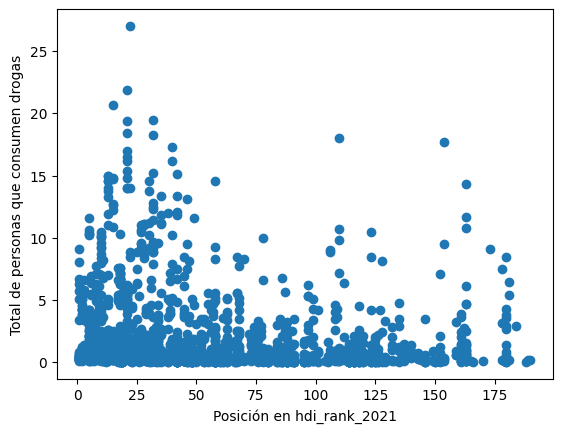

: 

In [30]:
import matplotlib.pyplot as plt

# Selecciona las columnas que quieres utilizar
x = drugs_hdi['hdi_rank_2021']
y = drugs_hdi['Total']

# Crea el gráfico de dispersión
plt.scatter(x, y)

# Añade etiquetas a los ejes
plt.xlabel('Posición en hdi_rank_2021')
plt.ylabel('Total de personas que consumen drogas')

# Muestra el gráfico
plt.show()